In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-cltv-of-a-customer/train_BRCpofr.csv
/kaggle/input/predict-cltv-of-a-customer/test_koRSKBP.csv
/kaggle/input/predict-cltv-of-a-customer/sample_submission_9zqft7i/sample_submission.csv
/kaggle/input/predict-cltv-of-a-customer/sample_submission_9zqft7i/How to Create Sample Submission File.ipynb


In [2]:
df= pd.read_csv('/kaggle/input/predict-cltv-of-a-customer/train_BRCpofr.csv')

In [3]:
df.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [5]:
df_new = df.drop('id', axis = 1)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df_new.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

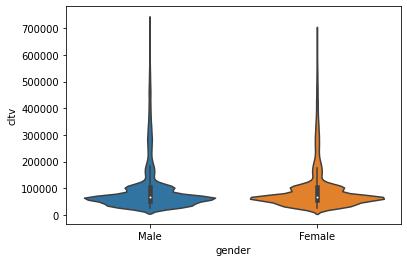

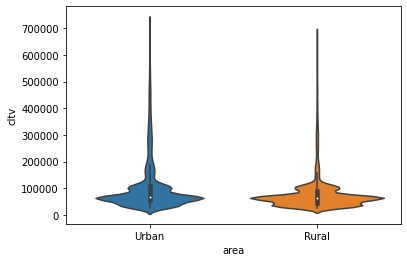

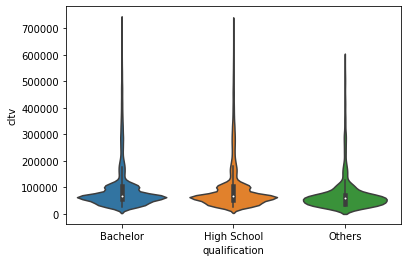

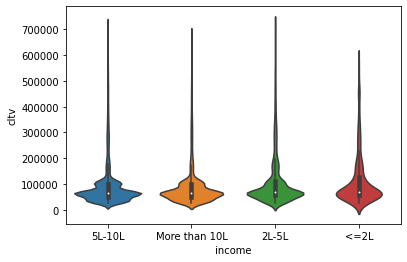

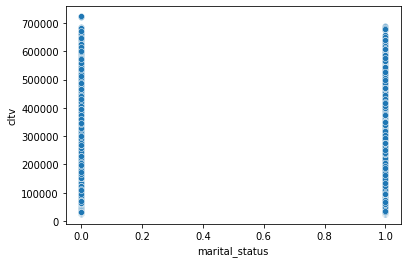

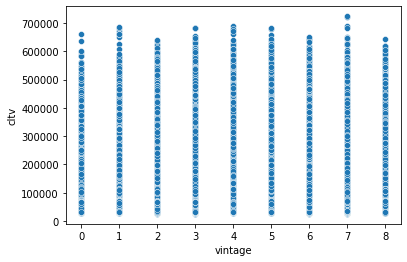

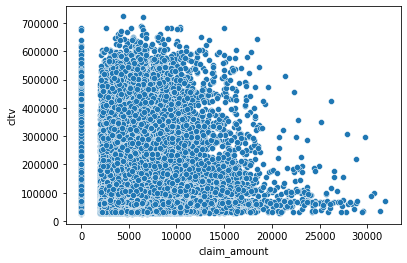

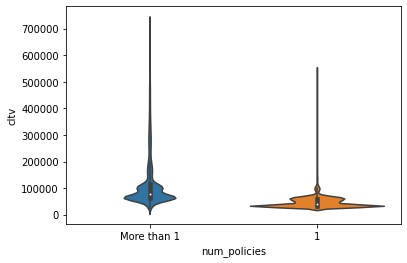

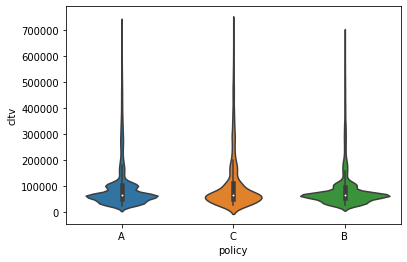

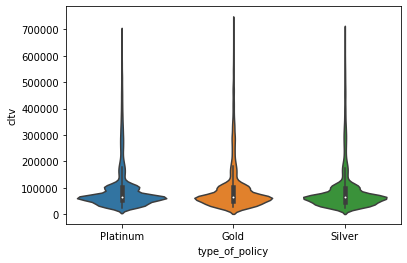

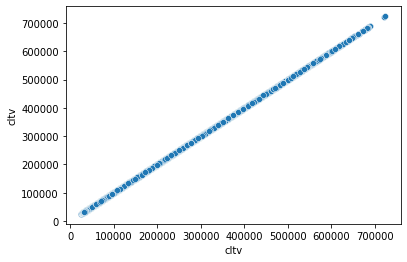

In [8]:
for x in df_new.columns:
    if df_new[x].dtype == 'object':
        sns.violinplot(x = x, y = 'cltv', data = df_new)
        plt.show()
    else:
        sns.scatterplot(x=x, y = 'cltv', data = df_new)
        plt.show()

In [9]:
df_new.isnull().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [10]:
y = df_new['cltv']

In [11]:
df_pre = df_new.drop('cltv', axis = 1)

In [12]:
category = []
num = []
for x in df_pre.columns:
    if df_pre[x].dtype == 'object':
        category.append(x)
    else:
        num.append(x)

In [13]:
df_cat = df_pre[category]
df_num = df_pre[num]

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
le = OneHotEncoder()

In [16]:
df_cat_d = pd.DataFrame(le.fit_transform(df_cat).toarray())
df_cat_d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
X = df_num.join(df_cat_d).values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error as MSE

In [23]:
y_pred= linr.predict(X_test)
np.sqrt(MSE(y_test, y_pred))

84468.8724084338

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
np.sqrt(MSE(y_test, y_pred))

119301.81767080932

In [26]:
from sklearn.ensemble import  GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 300, max_depth = 1, max_features = 0.2)
gbr.fit(X_train, y_train)
y_pred= gbr.predict(X_test)
np.sqrt(MSE(y_test, y_pred))

84378.97885954283

In [27]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 1,
 'max_features': 0.2,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
gbr = GradientBoostingRegressor(n_estimators = 300, max_features= 0.2, min_samples_leaf= 1, subsample= 0.8)
gbr.fit(X_train, y_train)
y_pred= gbr.predict(X_test)
np.sqrt(MSE(y_test, y_pred))

84078.35970848371

In [30]:
df_test = pd.read_csv('/kaggle/input/predict-cltv-of-a-customer/test_koRSKBP.csv')

In [31]:
df_f_t=df_test.drop('id', axis = 1)

In [32]:
d_f_t  =  df_f_t[category]
d_f_n = df_f_t[num]

In [33]:
df_c_t_f = pd.DataFrame(le.transform(d_f_t).toarray())

In [34]:
df_tet_final = d_f_n.join(df_c_t_f)

In [35]:
y_pred= gbr.predict(df_tet_final.values)
y_pred

array([ 93026.74022137, 129459.02962318,  98929.43106071, ...,
       109616.4201527 , 110013.36584308, 112654.55429182])